# 1. Import các thư viện cần thiết và đọc data

In [1]:
# Ipmport cá thưu viện cơ bản
import numpy as np 
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
PATH = 'data_output/all_articles.csv'
print(PATH)

data_output/all_articles.csv


In [3]:
data = pd.read_csv(PATH).drop_duplicates()
data = data.reset_index(drop=True)
data

,title,price,size,unit,streetAddress,addressLocality,addressRegion,time_update,post_id,direction,...,legal_documents,width,length,num_floors,num_bedrooms,has_dining_room,has_kitchen,has_rooftop,has_parking,is_owner
0,🍀🍀🍀Bán gấp căn nhà NGAY CHỢ BÌNH CHÁNH đang ch...,630 triệu,120,m²,Đường Trịnh Như Khuê,Xã Bình Chánh,Hồ Chí Minh,2025-10-13,17230039,NaN,...,Sổ hồng/ Sổ đỏ,6m,19m,1.0,3.0,yes,yes,yes,yes,NaN
1,CỰC HIẾM_NHÀ C4 MẶT PHỐ DOÃN UẨN–VIEW PHÁO HOA...,"10,5 tỷ",148,m²,Đường Doãn Uẩn,Phường Ngũ Hành Sơn,Đà Nẵng,2025-10-13,17363855,NaN,...,Sổ hồng/ Sổ đỏ,5m,30m,1.0,6.0,NaN,NaN,NaN,NaN,NaN
2,"Bán nhà Trường Chinh, 5x16, có 7 phòng trọ, ph...","6,8 tỷ",80,m²,Đường Trường Chinh,Phường Tân Sơn,Hồ Chí Minh,2025-10-13,17486637,NaN,...,Sổ hồng/ Sổ đỏ,5m,16m,2.0,7.0,NaN,NaN,NaN,NaN,NaN
3,"Bán nhà Phan Huy Ích 14x33, Biệt Thự cổ, chính...",38 tỷ,462,m²,Đường Phan Huy Ích,Phường Tân Sơn,Hồ Chí Minh,2025-10-13,17487248,NaN,...,Sổ hồng/ Sổ đỏ,14m,33m,3.0,3.0,NaN,NaN,NaN,NaN,NaN
4,Kẹt tiền nên chú Hai cần bán gấp 2 căn nhà đan...,650 triệu,120,m²,Đường Trịnh Như Khuê,Xã Bình Chánh,Hồ Chí Minh,2025-10-13,17451076,NaN,...,Sổ hồng/ Sổ đỏ,6m,20m,2.0,3.0,yes,yes,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3609,"Hàng Hót chính chủ cần bán 90m2 tại Tân Dân, K...","2,6 tỷ",90,m²,NaN,Xã Triệu Việt Vương,Hưng Yên,2025-10-28,17543238,NaN,...,NaN,"4,5m",20m,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3610,MỖ LAO - HÀ ĐÔNG - 50M - 6T - PL - OTO - KD - ...,"18,5 tỷ",50,m²,Phố Nguyễn Văn Trỗi,Phường Hà Đông,Hà Nội,2025-10-28,15887755,NaN,...,Sổ hồng/ Sổ đỏ,5m,11m,5.0,5.0,yes,yes,yes,yes,NaN
3611,"Bán nhà mặt tiền đường Cao Thắng, P.12, Quận 1...",70 tỷ,176,m²,Đường Cao Thắng,Phường Hòa Hưng,Hồ Chí Minh,2025-10-28,15886529,NaN,...,Sổ hồng/ Sổ đỏ,8m,20m,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3612,"Nhà 3 Tầng Hẻm 10m Ung Văn Khiêm, P.25, Bình T...",24 tỷ,160,m²,Đường Ung Văn Khiêm,Phường Thạnh Mỹ Tây,Hồ Chí Minh,2025-10-28,15887209,NaN,...,Sổ hồng/ Sổ đỏ,8m,20m,3.0,5.0,NaN,NaN,NaN,NaN,NaN


# 1.1. Chuẩn hóa đơn vị

In [4]:
# Ipmport cá thưu viện cơ bản
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Xem phân bố nhãn đơn vị

In [5]:
data['unit'].value_counts()

unit
m²    3614
Name: count, dtype: int64

Chuẩn hóa số, đơn vị tính toán

In [6]:
def extract_number(value):
    if pd.isna(value) or not isinstance(value, str):
        return np.nan
    value = value.replace(",", ".")
    value = value.split('m')[0].strip()
    try:
        return float(value)
    except ValueError:
        return np.nan


def feature_preprocessing(data):
    """Hàm tiền xử lý, chuẩn hóa cho dữ liệu thô"""

    data = data.copy()

    # Chuẩn hóa giá tiền price
    price_pre = []
    for index, price  in enumerate(data['price']):

        if 'triệu / m²' in price:
            price_pre.append(float(price.replace(",", ".").split()[0]) * data['size'][index]) # Nếu xuất hiện đơn vị triệu / m², nhân nó với cột chứa size (m²)
        elif 'tỷ' in price:
            price_pre.append(float(price.replace(",", ".").split()[0]) * 1000) # Nếu đơn vị là tỷ, quy về triệu
        elif 'triệu' in price:
            price_pre.append(float(price.replace(",", ".").split()[0])) # Nếu đã là triệu, thêm trực tiếp
        elif 'Thỏa thuận' in price:
            pass
        else:
            print(price, type(price))
            print(data['size'][index], type(data['size'][index]))
            pass
    
    data['price'] = pd.Series(price_pre)

    # Trích xuất số cho các cột số bị lẫn đơn vị văn bản
    cols_need_extract = ['road_width', 'width', 'length']
    for col in cols_need_extract:
        data[col] = data[col].apply(extract_number)

    data = data.dropna(subset=['price'])

    # Chuyển feature đơn vị data['size'] về dạng float, xử lý với các kiểu dữ liệu không thể chuyển được qua (drop), cụ thể là sample 43.000.000
    data['size'] = pd.to_numeric(data['size'], errors='coerce')
    data = data.dropna(subset=['size'])

    data = data.reset_index(drop=True)

    return data

In [7]:
data = feature_preprocessing(data)
data.head()

9 ngàn <class 'str'>
32 <class 'str'>


,title,price,size,unit,streetAddress,addressLocality,addressRegion,time_update,post_id,direction,...,legal_documents,width,length,num_floors,num_bedrooms,has_dining_room,has_kitchen,has_rooftop,has_parking,is_owner
0,🍀🍀🍀Bán gấp căn nhà NGAY CHỢ BÌNH CHÁNH đang ch...,630.0,120.0,m²,Đường Trịnh Như Khuê,Xã Bình Chánh,Hồ Chí Minh,2025-10-13,17230039,NaN,...,Sổ hồng/ Sổ đỏ,6.0,19.0,1.0,3.0,yes,yes,yes,yes,NaN
1,CỰC HIẾM_NHÀ C4 MẶT PHỐ DOÃN UẨN–VIEW PHÁO HOA...,10500.0,148.0,m²,Đường Doãn Uẩn,Phường Ngũ Hành Sơn,Đà Nẵng,2025-10-13,17363855,NaN,...,Sổ hồng/ Sổ đỏ,5.0,30.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN
2,"Bán nhà Trường Chinh, 5x16, có 7 phòng trọ, ph...",6800.0,80.0,m²,Đường Trường Chinh,Phường Tân Sơn,Hồ Chí Minh,2025-10-13,17486637,NaN,...,Sổ hồng/ Sổ đỏ,5.0,16.0,2.0,7.0,NaN,NaN,NaN,NaN,NaN
3,"Bán nhà Phan Huy Ích 14x33, Biệt Thự cổ, chính...",38000.0,462.0,m²,Đường Phan Huy Ích,Phường Tân Sơn,Hồ Chí Minh,2025-10-13,17487248,NaN,...,Sổ hồng/ Sổ đỏ,14.0,33.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN
4,Kẹt tiền nên chú Hai cần bán gấp 2 căn nhà đan...,650.0,120.0,m²,Đường Trịnh Như Khuê,Xã Bình Chánh,Hồ Chí Minh,2025-10-13,17451076,NaN,...,Sổ hồng/ Sổ đỏ,6.0,20.0,2.0,3.0,yes,yes,NaN,NaN,NaN


# 2. EDA phân tích data

In [8]:
data = data.drop(['title', 'post_id', 'unit', 'time_update', 'listing_type'], axis=1)
data.head()

,price,size,streetAddress,addressLocality,addressRegion,direction,road_width,property_type,legal_documents,width,length,num_floors,num_bedrooms,has_dining_room,has_kitchen,has_rooftop,has_parking,is_owner
0,630.0,120.0,Đường Trịnh Như Khuê,Xã Bình Chánh,Hồ Chí Minh,NaN,8.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,6.0,19.0,1.0,3.0,yes,yes,yes,yes,NaN
1,10500.0,148.0,Đường Doãn Uẩn,Phường Ngũ Hành Sơn,Đà Nẵng,NaN,7.5,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5.0,30.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN
2,6800.0,80.0,Đường Trường Chinh,Phường Tân Sơn,Hồ Chí Minh,NaN,4.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,5.0,16.0,2.0,7.0,NaN,NaN,NaN,NaN,NaN
3,38000.0,462.0,Đường Phan Huy Ích,Phường Tân Sơn,Hồ Chí Minh,NaN,12.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,14.0,33.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN
4,650.0,120.0,Đường Trịnh Như Khuê,Xã Bình Chánh,Hồ Chí Minh,NaN,8.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,6.0,20.0,2.0,3.0,yes,yes,NaN,NaN,NaN


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3599 entries, 0 to 3598
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            3599 non-null   float64
 1   size             3599 non-null   float64
 2   streetAddress    3321 non-null   object 
 3   addressLocality  3588 non-null   object 
 4   addressRegion    3599 non-null   object 
 5   direction        897 non-null    object 
 6   road_width       3396 non-null   float64
 7   property_type    3599 non-null   object 
 8   legal_documents  2743 non-null   object 
 9   width            2908 non-null   float64
 10  length           2397 non-null   float64
 11  num_floors       2514 non-null   float64
 12  num_bedrooms     2529 non-null   float64
 13  has_dining_room  1270 non-null   object 
 14  has_kitchen      1287 non-null   object 
 15  has_rooftop      1108 non-null   object 
 16  has_parking      1184 non-null   object 
 17  is_owner      

In [10]:
data.describe()

,price,size,road_width,width,length,num_floors,num_bedrooms
count,3.599000e+03,3599.000000,3396.000000,2908.000000,2397.000000,2514.000000,2529.000000
mean,2.379184e+04,128.665901,11.533746,7.866455,21.551992,4.381464,6.842230
std,6.182695e+04,126.591383,23.038733,12.496386,17.638750,4.427116,12.869938
min,1.500000e+00,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,4.600000e+03,60.000000,5.000000,4.500000,15.000000,2.000000,3.000000
50%,9.300000e+03,90.000000,7.500000,5.000000,19.000000,4.000000,4.000000
75%,2.000000e+04,140.000000,14.000000,8.000000,24.000000,5.000000,6.000000
max,1.350000e+06,995.000000,999.000000,485.000000,415.000000,88.000000,264.000000


In [11]:
data.describe()

,price,size,road_width,width,length,num_floors,num_bedrooms
count,3.599000e+03,3599.000000,3396.000000,2908.000000,2397.000000,2514.000000,2529.000000
mean,2.379184e+04,128.665901,11.533746,7.866455,21.551992,4.381464,6.842230
std,6.182695e+04,126.591383,23.038733,12.496386,17.638750,4.427116,12.869938
min,1.500000e+00,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,4.600000e+03,60.000000,5.000000,4.500000,15.000000,2.000000,3.000000
50%,9.300000e+03,90.000000,7.500000,5.000000,19.000000,4.000000,4.000000
75%,2.000000e+04,140.000000,14.000000,8.000000,24.000000,5.000000,6.000000
max,1.350000e+06,995.000000,999.000000,485.000000,415.000000,88.000000,264.000000


Kiểm tra phân bố giá trị missing value

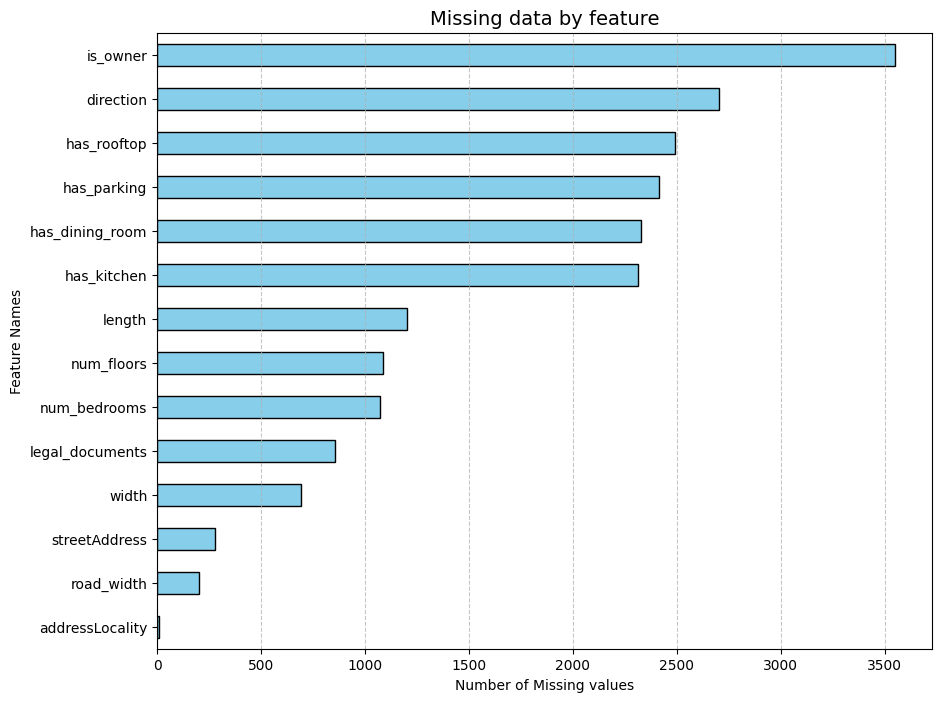

In [12]:
missing = data.isnull().sum()
missing = missing[missing > 0]
missing = missing.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
missing.plot.barh(color="skyblue", edgecolor="black")
plt.title("Missing data by feature", fontsize=14)
plt.xlabel("Number of Missing values")
plt.ylabel("Feature Names")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.gca().invert_yaxis()
plt.show()

Biểu đổ ma trận tương quan thể hiện mức độ tương quan giữa các biến số trong tập dữ liệu:
- Tông xanh thể hiện tương quan âm
- Tông đỏ thể hiện tưởng quan dương

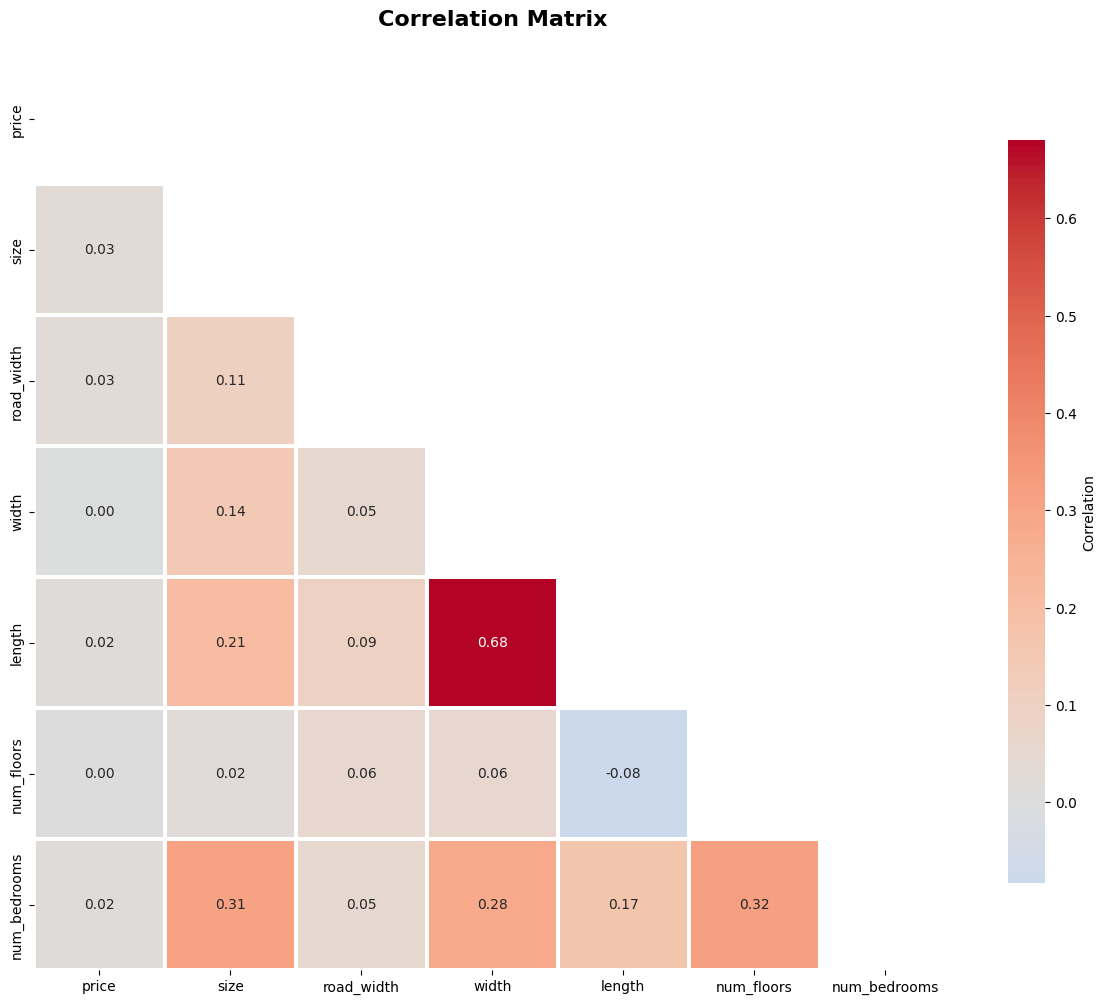

In [13]:
corr_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f',
           cmap='coolwarm', center=0, square=True, linewidths=1.5,
           cbar_kws={"shrink": 0.8, "label": "Correlation"})
plt.title('Correlation Matrix',
         fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [14]:
corr_feature_2price = data.corr(numeric_only=True)['price'].sort_values(ascending=False)[1:]
corr_feature_2price

size            0.028652
road_width      0.026704
num_bedrooms    0.017386
length          0.016698
num_floors      0.002539
width           0.000279
Name: price, dtype: float64

In [15]:
data['price_per_unit'] = data['price'] / data['size']
data['price_per_unit'].head()

0     5.250000
1    70.945946
2    85.000000
3    82.251082
4     5.416667
Name: price_per_unit, dtype: float64

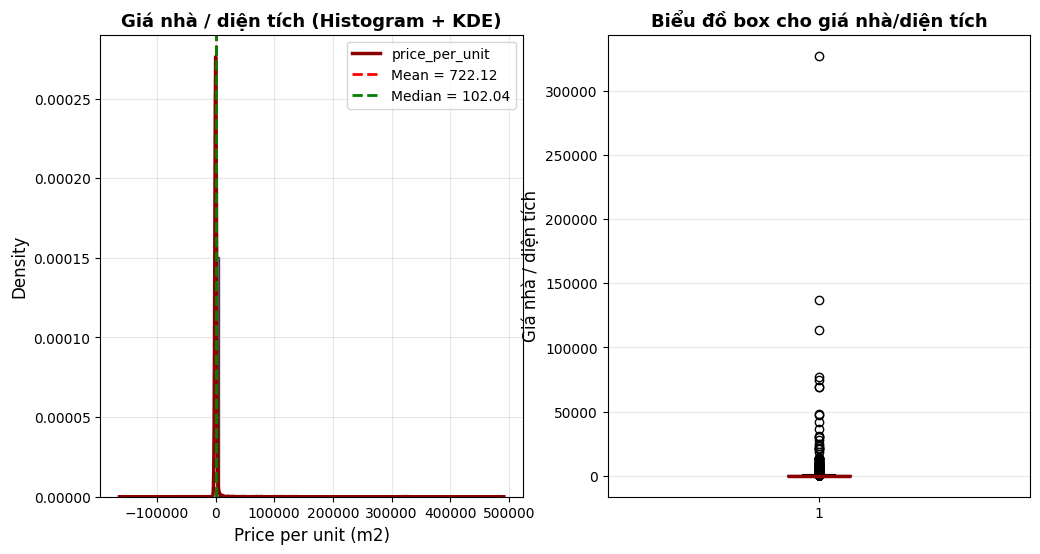

In [16]:

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram vowis KDE
axes[0].hist(data['price_per_unit'], bins=50, color='steelblue',
                edgecolor='black', alpha=0.7, density=True)

data['price_per_unit'].plot(kind='kde', ax=axes[0], linewidth=2.5, color='darkred')
axes[0].axvline(data['price_per_unit'].mean(), color='red', linestyle="--",
                   linewidth=2, label=f'Mean = {data['price_per_unit'].mean():.2f}')
axes[0].axvline(data['price_per_unit'].median(), color='green', linestyle="--",
                   linewidth=2, label=f'Median = {data['price_per_unit'].median():.2f}')

axes[0].set_xlabel('Price per unit (m2)', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)
axes[0].set_title('Giá nhà / diện tích (Histogram + KDE)',
                    fontsize=13, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(alpha=0.3)

# Boxplot
bp = axes[1].boxplot(data['price_per_unit'], vert=True, patch_artist=True,
                         boxprops=dict(facecolor='lightcoral', alpha=0.7),
                         medianprops=dict(color='darkred', linewidth=2.5),
                         whiskerprops=dict(linewidth=1.5),
                         capprops=dict(linewidth=1.5))
axes[1].set_ylabel('Giá nhà / diện tích', fontsize=12)
axes[1].set_title('Biểu đồ box cho giá nhà/diện tích', fontsize=13, fontweight='bold')
axes[1].grid(alpha=0.3, axis='y')



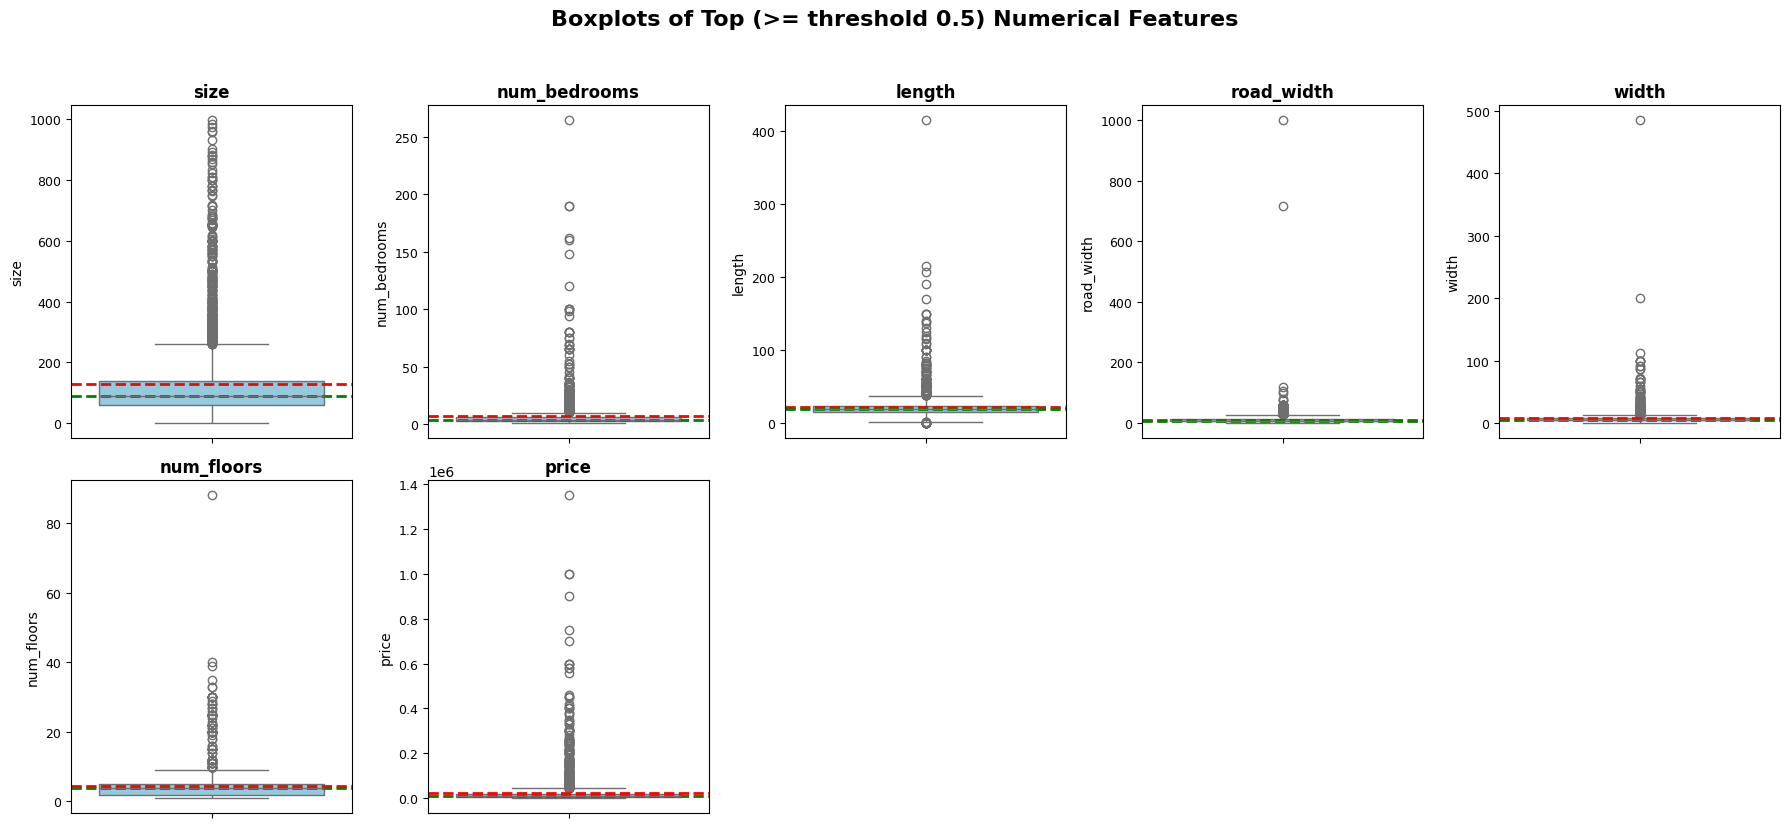

In [17]:
important_cols = [
    "size", "num_bedrooms", "length", "road_width",
    "width", "num_floors", "price"
]

fig, axes = plt.subplots(2, 5, figsize=(18, 8))
axes = axes.flatten()

for i, col in enumerate(important_cols):
    sns.boxplot(data=data, y=col, ax=axes[i], color="skyblue")
    axes[i].set_title(col, fontsize=12, fontweight="bold")
    axes[i].tick_params(labelsize=9)
    axes[i].axhline(data[col].mean(), color='red', linestyle="--",
                   linewidth=2, label=f'Mean = {data[col].mean():.2f}')
    axes[i].axhline(data[col].median(), color='green', linestyle="--",
                   linewidth=2, label=f'Median = {data[col].median():.2f}')

for i in range(len(important_cols), len(axes)):
    axes[i].set_visible(False)

plt.suptitle("Boxplots of Top (>= threshold 0.5) Numerical Features", fontsize=16,
             fontweight="bold", y=1.03)

plt.tight_layout()
plt.show()



📈 SCATTER PLOTS: FEATURES vs PRICE


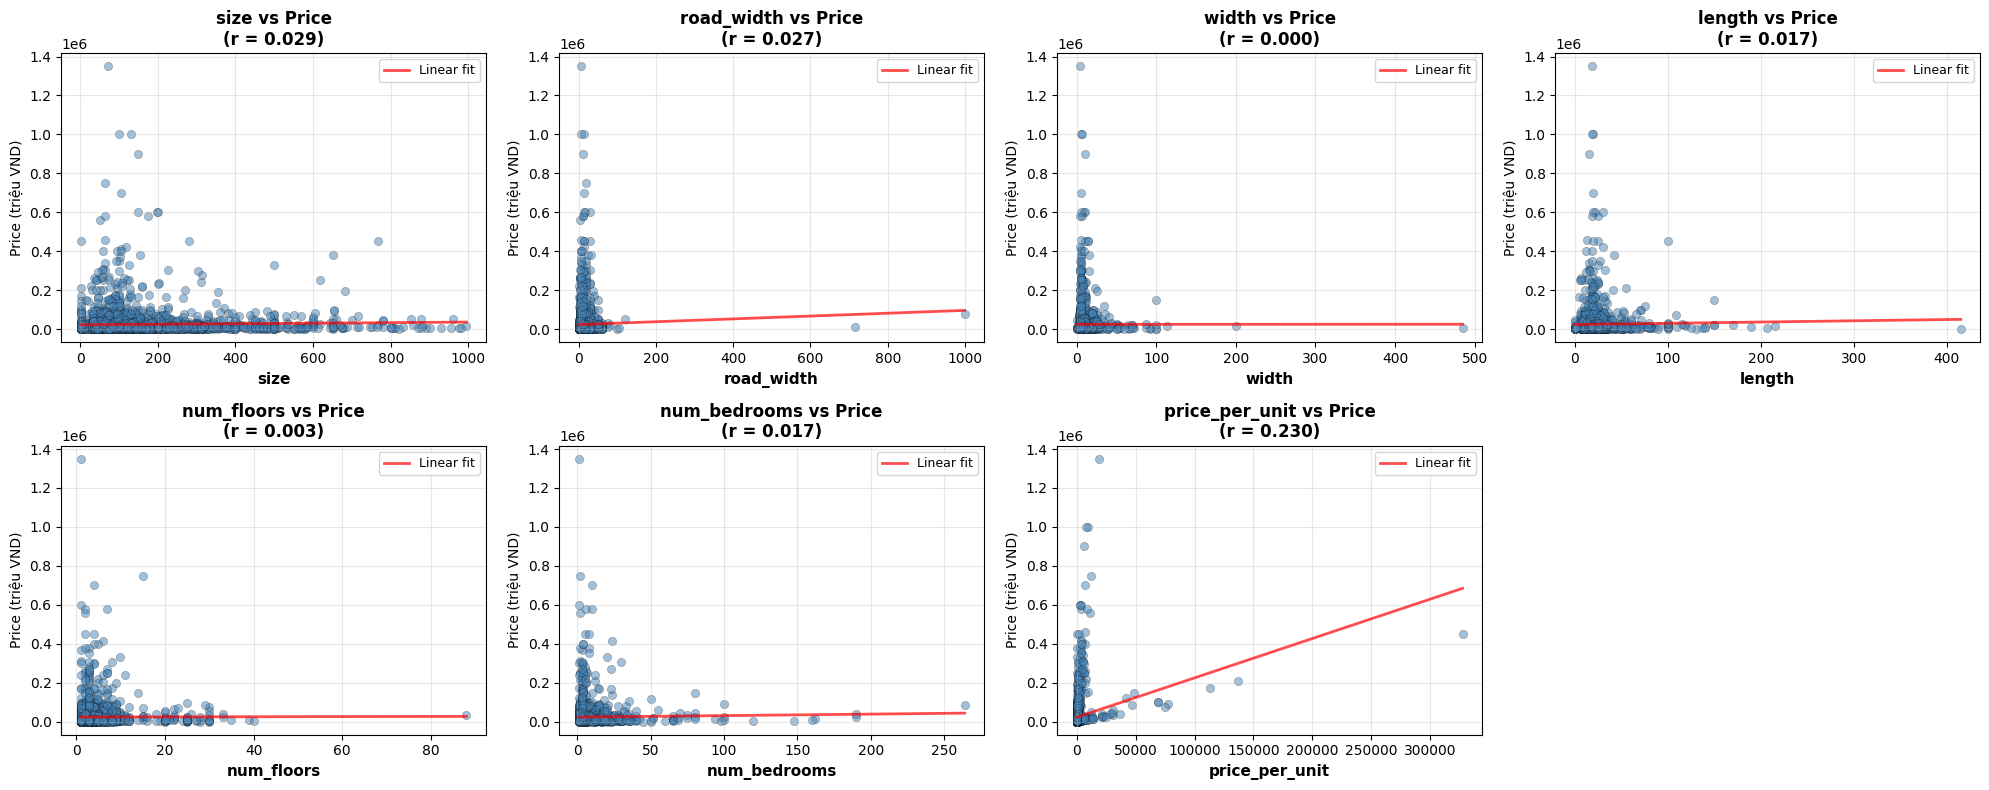

In [18]:
print("\n" + "=" * 80)
print("📈 SCATTER PLOTS: FEATURES vs PRICE")
print("=" * 80)

# Lấy tất cả các cột trừ cột target 'price'
features = list(data.drop('price', axis=1).columns)

# Lọc ra chỉ các cột số để vẽ scatter plot
numeric_features = [feat for feat in features if pd.api.types.is_numeric_dtype(data[feat])]

# Tính toán số hàng và cột cho subplot
num_features = len(numeric_features)
num_cols = 4  # Số cột tối đa cho biểu đồ
num_rows = (num_features + num_cols - 1) // num_cols # Đảm bảo đủ hàng

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 4))
axes = axes.flatten()

for idx, feat in enumerate(numeric_features):
    # Scatter plot
    axes[idx].scatter(data[feat], data['price'], alpha=0.5, s=35,
                     color='steelblue', edgecolor='k', linewidth=0.3)

    # Thêm regression line (linear) - chỉ khi có đủ phương sai và dữ liệu
    # Lọc bỏ NaN cho việc tính toán polyfit
    temp_data = data[[feat, 'price']].dropna()
    if len(temp_data) > 1 and temp_data[feat].nunique() > 1: 
        z = np.polyfit(temp_data[feat], temp_data['price'], 1)
        p = np.poly1d(z)
        x_line = np.linspace(temp_data[feat].min(), temp_data[feat].max(), 100)
        axes[idx].plot(x_line, p(x_line), 'r-', linewidth=2, alpha=0.7, label='Linear fit')

    # Correlation
    corr = data[feat].corr(data['price'])

    # Labels và title
    axes[idx].set_xlabel(feat, fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Price (triệu VND)', fontsize=10)
    axes[idx].set_title(f'{feat} vs Price\n(r = {corr:.3f})',
                       fontsize=12, fontweight='bold')
    axes[idx].legend(fontsize=9)
    axes[idx].grid(alpha=0.3)

# Ẩn các subplot không sử dụng nếu có
for i in range(num_features, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

Với boxplot, ta nhận định:
- Với diện tích, diện tích hộp nằm ở vị trí rất thấp và các giá trị cực đoan có thể kéo dài lên tận 1000 m2, với bối cảnh ở việt nam thì 300m2 đã là rất lớn, thường dành cho biệt thự hoặc nhà phố có quy mô lớn
- Cột giá nhà cho thấy phân phối rất lệch, phần lớn giá tập trungở mức thấp, nhà bình thường hiếm khi có giá cao và các giá cao hầu như đại diện cho bất động sản ở vị trí kim cương hoặc dinh thự, điều này không hợp lý với dự đoán giá nhà thông thường 
- Các giá trị ở các cột chiều dài, rộng, chiều rộng đường cũng có khá nhiều giá trị ngoại lai, khi các outlier kéo rất dài và có thể là các lô đất nông nghiệp thương mại rất lớn, không phù hợp cho bài toán dự đoán giá nhà dân dụng

# 3. Tiền xử lý dữ liệu

In [19]:
# Ipmport cá thưu viện cơ bản
import numpy as np 
import pandas as pd

# Import các thư viện tiền xử lý
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, RobustScaler


import matplotlib.pyplot as plt
import seaborn as sns

Chuẩn hóa cột giá trị bool về nhị phân thay vì yes, no

In [20]:
def bool_to_num(sample):
    if sample == 'yes':
        return 1


cols_bool = ['has_dining_room', 'has_kitchen', 'has_rooftop', 'has_parking', 'is_owner']
for col in cols_bool:
    data[col] = data[col].apply(bool_to_num)

data.head()

,price,size,streetAddress,addressLocality,addressRegion,direction,road_width,property_type,legal_documents,width,length,num_floors,num_bedrooms,has_dining_room,has_kitchen,has_rooftop,has_parking,is_owner,price_per_unit
0,630.0,120.0,Đường Trịnh Như Khuê,Xã Bình Chánh,Hồ Chí Minh,NaN,8.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,6.0,19.0,1.0,3.0,1.0,1.0,1.0,1.0,NaN,5.250000
1,10500.0,148.0,Đường Doãn Uẩn,Phường Ngũ Hành Sơn,Đà Nẵng,NaN,7.5,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5.0,30.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN,70.945946
2,6800.0,80.0,Đường Trường Chinh,Phường Tân Sơn,Hồ Chí Minh,NaN,4.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,5.0,16.0,2.0,7.0,NaN,NaN,NaN,NaN,NaN,85.000000
3,38000.0,462.0,Đường Phan Huy Ích,Phường Tân Sơn,Hồ Chí Minh,NaN,12.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,14.0,33.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,82.251082
4,650.0,120.0,Đường Trịnh Như Khuê,Xã Bình Chánh,Hồ Chí Minh,NaN,8.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,6.0,20.0,2.0,3.0,1.0,1.0,NaN,NaN,NaN,5.416667


Drop cột bị thiếu quá nhiều giá trị: is_owner, bị thiếu quá 95%

In [21]:
data = data.drop(['is_owner'], axis=1)

### Tách riêng 2 tập train/test và nhãn

In [22]:
train_df, test_df = train_test_split(
    data,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

In [23]:
train_df

,price,size,streetAddress,addressLocality,addressRegion,direction,road_width,property_type,legal_documents,width,length,num_floors,num_bedrooms,has_dining_room,has_kitchen,has_rooftop,has_parking,price_per_unit
2132,7600.0,500.0,Đường số 13,Phường Bình Trưng,Hồ Chí Minh,NaN,8.0,"Biệt thự, nhà liền kề",Sổ hồng/ Sổ đỏ,20.0,25.0,1.0,3.0,1.0,1.0,NaN,1.0,15.200000
2382,17500.0,64.0,Đường Ngô Thì Nhậm,Phường Xuân Hương - Đà Lạt,Lâm Đồng,NaN,6.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5.0,14.0,3.0,3.0,NaN,NaN,NaN,NaN,273.437500
1615,32000.0,56.0,Đường Số 14,Phường Bình Tân,Hồ Chí Minh,Tây,12.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,4.0,14.0,4.0,5.0,1.0,1.0,1.0,1.0,571.428571
3310,4850.0,91.0,Đường Số 5,Phường Tăng Nhơn Phú,Hồ Chí Minh,NaN,4.0,"Đất thổ cư, đất ở",Sổ hồng/ Sổ đỏ,4.2,22.0,NaN,NaN,NaN,NaN,NaN,NaN,53.296703
1128,300000.0,100.0,Đường Điện Biên Phủ,Phường Bắc Nha Trang,Khánh Hòa,Bắc,20.0,Nhà mặt tiền,NaN,5.0,20.0,4.0,4.0,1.0,1.0,1.0,1.0,3000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,73.0,55.0,Quốc lộ 1A,Xã Mỹ Yên,Tây Ninh,NaN,30.0,Căn hộ chung cư,Sổ hồng/ Sổ đỏ,6.0,9.0,20.0,2.0,NaN,NaN,NaN,NaN,1.327273
1294,9500.0,145.0,Đường Thiên Hiền,Phường Từ Liêm,Hà Nội,NaN,8.0,"Biệt thự, nhà liền kề",Sổ hồng/ Sổ đỏ,22.0,NaN,4.0,4.0,1.0,1.0,1.0,1.0,65.517241
860,49000.0,73.0,Đường Vũ Bảo,Phường Quy Nhơn Nam,Gia Lai,NaN,16.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,4.7,NaN,1.0,2.0,NaN,NaN,NaN,NaN,671.232877
3507,14.5,170.0,Đường Lê Văn Sỹ,Phường Nhiêu Lộc,Hồ Chí Minh,NaN,8.0,Nhà trong hẻm,NaN,8.8,20.0,3.0,5.0,NaN,NaN,NaN,NaN,0.085294


Về giá nhà/m2: Do phát hiện có ngoại lai RẤT LỚN là, tức 1000 tỷ/m2, hay các giá trị như 0.01 triệu/m2, nên giá trị này rất vô lý, có khẳ năng là lỗi nhập liệu
- Nên sẽ  tiến hành loại bỏ lỗi outlier CỰC ĐOAN
- Giá nhà trung bình ở việt nam thấp nhất là khoảng 16-25 triệu/m2
- Giá các căn nhà cao cấp ở việt nam cao nhất cùng lắm 1 tỷ/m2 hiện tại 

Theo điều 27 nghị định 100/2024/NĐ-CP có ghi rõ, nhà đất như nhà chung cư phải đáp ưng đủ tối thiếu là 25m2 để đảm bảo quy hoạch xây dựng co cơ quan nhà nước có thẩm quyền phê duyệt (Nguồn: https://luatvietnam.vn/dat-dai-nha-o/nha-o-xa-hoi-567-30110-article.html)
- Về cột kích thước, ta có thể thấy có bài đăng có kích thước rất bé là 1 m2, điều này là bất hợp lý vì diện tích bé nhất (nhà ở xã hội) do luật đất đai quy định cũng bé ít nhất là 25m2 
- Về số tầng, Số tầng nhà cao nhất  VN cũng chỉ ~81 tầng (Landmark 81), nhưng bài dự đoán cho nhà bình thường, không phải chung cư hoặc nhà cao cấp nên bình thường gía trị sẽ ở khoảng 7 - 10 tầng
- Về số phòng ngủ, các nhà bình thường cùng lắm chỉ có 12 phòng ngủ là nhiềunhiều


In [24]:
def rule_base_preprocess(data):
    data = data.copy()
    # Loại bỏ dữ liệu có giá nhà/unit quá cao, nghi do lỗi nhập liệu
    data = data[(data['price_per_unit'] > 16) & (data['price_per_unit'] < 1000)]
    # Theo quy định, ta có thể loại bỏ áp dụng cho toàn bộ nhà đất
    data = data[data['size'] >= 25]
    # Trong thực tế, rất khó có nhà có số ngủ quá lớn mà chỉ giới hạn nhiều nhất khoảng 10 - 12 phòng ngủ, nếu trên có khả năng là nhà quá to hoặc chung cư
    data = data[data['num_bedrooms'] <= 12]
    # Các nhà biệt thự cùng lắm cũng chỉ 7 - 10 tầng, nếu cao hơn cũng có khả năng nhưng chủ yếu là các tòa nhà chung cư lớn
    data = data[data['num_floors'] < 10]

    data = data.drop(['price_per_unit'], axis=1)

    return data

In [25]:
# Áp dụng cho cả tập train và test
train_df = rule_base_preprocess(train_df)
test_df = rule_base_preprocess(test_df)

In [26]:
train_df

,price,size,streetAddress,addressLocality,addressRegion,direction,road_width,property_type,legal_documents,width,length,num_floors,num_bedrooms,has_dining_room,has_kitchen,has_rooftop,has_parking
2382,17500.0,64.0,Đường Ngô Thì Nhậm,Phường Xuân Hương - Đà Lạt,Lâm Đồng,NaN,6.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5.0,14.0,3.0,3.0,NaN,NaN,NaN,NaN
1615,32000.0,56.0,Đường Số 14,Phường Bình Tân,Hồ Chí Minh,Tây,12.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,4.0,14.0,4.0,5.0,1.0,1.0,1.0,1.0
2183,26000.0,72.0,Đường Trường Chinh,Phường Tân Bình,Hồ Chí Minh,Đông,6.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,4.0,18.0,3.0,5.0,1.0,1.0,1.0,1.0
2795,14300.0,160.0,Đường Phú Thọ Hòa,Phường Phú Thọ Hòa,Hồ Chí Minh,NaN,15.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,8.0,20.0,4.0,6.0,NaN,NaN,NaN,NaN
2548,1850.0,35.0,Đường Nam Dư,Phường Lĩnh Nam,Hà Nội,NaN,3.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,3.5,10.0,5.0,3.0,1.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,22000.0,80.0,Đường Nguyễn Minh Hoàng,Phường Bảy Hiền,Hồ Chí Minh,NaN,10.0,"Biệt thự, nhà liền kề",Sổ hồng/ Sổ đỏ,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN
3092,16700.0,100.0,Đường số 3,Phường Nam Nha Trang,Khánh Hòa,Tây Nam,13.0,"Biệt thự, nhà liền kề",Giấy tờ hợp lệ,5.0,20.0,3.0,4.0,1.0,1.0,1.0,1.0
1294,9500.0,145.0,Đường Thiên Hiền,Phường Từ Liêm,Hà Nội,NaN,8.0,"Biệt thự, nhà liền kề",Sổ hồng/ Sổ đỏ,22.0,NaN,4.0,4.0,1.0,1.0,1.0,1.0
860,49000.0,73.0,Đường Vũ Bảo,Phường Quy Nhơn Nam,Gia Lai,NaN,16.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,4.7,NaN,1.0,2.0,NaN,NaN,NaN,NaN


In [27]:
test_df

,price,size,streetAddress,addressLocality,addressRegion,direction,road_width,property_type,legal_documents,width,length,num_floors,num_bedrooms,has_dining_room,has_kitchen,has_rooftop,has_parking
2213,8400.0,75.0,Đường Mai Hắc Đế,Phường Buôn Ma Thuột,Đắk Lắk,Tây,6.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,5.0,16.0,1.0,3.0,1.0,1.0,1.0,1.0
2852,16000.0,81.0,Đường Đa Mặn 5,Phường Ngũ Hành Sơn,Đà Nẵng,NaN,7.0,Nhà mặt tiền,NaN,4.5,18.0,2.0,2.0,1.0,NaN,1.0,1.0
211,7500.0,91.0,Đường Trần Thái Tông,Phường Tân Sơn,Hồ Chí Minh,NaN,6.0,"Biệt thự, nhà liền kề",Sổ hồng/ Sổ đỏ,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN
3514,39000.0,94.0,Đường Lê Văn Sỹ,Phường Tân Sơn Hòa,Hồ Chí Minh,NaN,10.0,Nhà trong hẻm,NaN,6.0,16.0,2.0,5.0,NaN,NaN,NaN,NaN
2585,11999.0,72.0,Đường Số 8,Phường Bình Tân,Hồ Chí Minh,NaN,8.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,4.0,18.0,2.0,4.0,1.0,1.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2621,12500.0,105.0,Đường Huỳnh Văn Nghệ,Phường Trấn Biên,Đồng Nai,NaN,6.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5.0,20.0,2.0,3.0,NaN,NaN,NaN,NaN
3526,29500.0,65.0,Đường Hoàng Quốc Việt,Phường Nghĩa Đô,Hà Nội,NaN,6.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,5.0,13.0,5.0,9.0,1.0,1.0,1.0,1.0
1041,2550.0,74.0,Phố Trung Kính,Phường Yên Hòa,Hà Nội,NaN,0.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,0.0,0.0,6.0,6.0,1.0,1.0,1.0,1.0
2069,25500.0,118.0,Đường Hoàng Dư Khương,Phường Cẩm Lệ,Đà Nẵng,NaN,7.5,Nhà mặt tiền,NaN,5.0,23.5,3.0,6.0,NaN,NaN,NaN,NaN


In [28]:
train_df.describe()

,price,size,road_width,width,length,num_floors,num_bedrooms,has_dining_room,has_kitchen,has_rooftop,has_parking
count,1442.000000,1442.000000,1426.000000,1206.000000,989.000000,1442.000000,1442.000000,726.0,735.0,644.0,644.0
mean,16146.221221,107.325936,10.818934,6.031053,17.924869,3.409847,4.364078,1.0,1.0,1.0,1.0
std,19839.620159,94.210636,27.647904,3.182332,7.926973,1.712261,2.247037,0.0,0.0,0.0,0.0
min,700.000000,25.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.0,1.0,1.0
25%,5950.000000,59.000000,5.000000,4.200000,13.200000,2.000000,3.000000,1.0,1.0,1.0,1.0
50%,10500.000000,82.500000,7.000000,5.000000,17.000000,3.000000,4.000000,1.0,1.0,1.0,1.0
75%,19000.000000,117.000000,12.000000,6.500000,21.000000,5.000000,5.000000,1.0,1.0,1.0,1.0
max,450000.000000,960.000000,999.000000,36.000000,109.000000,9.000000,12.000000,1.0,1.0,1.0,1.0


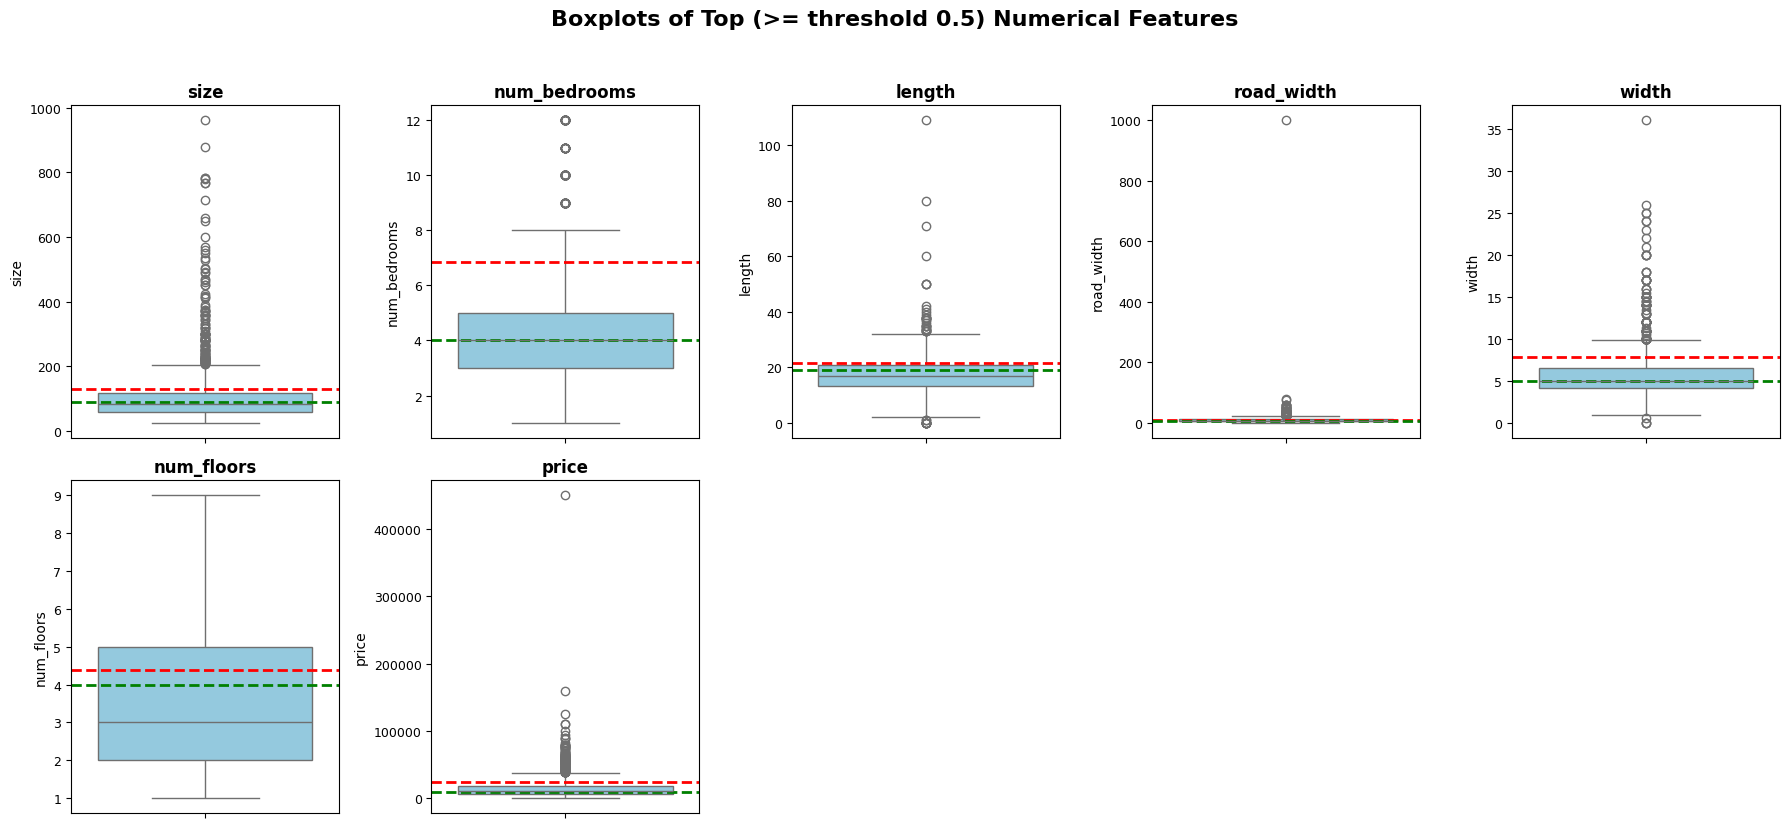

In [29]:
important_cols = [
    "size", "num_bedrooms", "length", "road_width",
    "width", "num_floors", "price"
]

fig, axes = plt.subplots(2, 5, figsize=(18, 8))
axes = axes.flatten()

for i, col in enumerate(important_cols):
    sns.boxplot(data=train_df, y=col, ax=axes[i], color="skyblue")
    axes[i].set_title(col, fontsize=12, fontweight="bold")
    axes[i].tick_params(labelsize=9)
    axes[i].axhline(data[col].mean(), color='red', linestyle="--",
                   linewidth=2, label=f'Mean = {data[col].mean():.2f}')
    axes[i].axhline(data[col].median(), color='green', linestyle="--",
                   linewidth=2, label=f'Median = {data[col].median():.2f}')

for i in range(len(important_cols), len(axes)):
    axes[i].set_visible(False)

plt.suptitle("Boxplots of Top (>= threshold 0.5) Numerical Features", fontsize=16,
             fontweight="bold", y=1.03)

plt.tight_layout()
plt.show()


#### Xử lý dữ liệu ngoại lai bằng phương pháp IQR

Sau khi plot biểu đồ box, ta có thể thấy dễ dàng các cột feature numberic đang có rất nhiều dữ liệu ngoại lai, bao gồm cả gột target, điều này có 2 ý nghĩa:
- Nếu dữ liệu là thật, 1 số điểm dữ liệu outlier có thể giúp mô hình khái quát tốt hơn với các trường hợp giá nhà cao cấp và dự đoán tốt hơn nếu trong tương lai gặp
- Hoặc ngược lại, các outlier là lỗi nhập liệu, dữ liệu giả chỉ nhập vào mà nếu mua người mau sẽ liên hệ trực tiếp qua người bán và giả thuyết cũng đang thiên về
  - Ví dụ: Giá nhà 999tỷ, mô tả có ghi liên hệ với người bán (chỉ là ví dụ cho những trường hợp có liên quan)

<br>

Nên ta sẽ sử lý outlier với các cột ['price']

In [30]:
def remove_outlier_with_IQR(train_df, test_df, col_names, LowerFence, UpperFence):
    train_df = train_df.copy()
    test_df = test_df.copy()
    
    for col_idx, col in enumerate(col_names):
        # Fit trên tập train 
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - LowerFence * IQR
        upper_bound = Q3 + UpperFence * IQR 

        # Transform cho cả train và test
        train_df = train_df[(train_df[col] >= lower_bound) & (train_df[col] <= upper_bound)]
        test_df = test_df[(test_df[col] >= lower_bound) & (test_df[col] <= upper_bound)]

    return train_df, test_df

In [31]:
col_have_outlier = ['price', 'size']

In [32]:
train_df, test_df = remove_outlier_with_IQR(train_df, test_df, col_names=col_have_outlier, LowerFence=1.5, UpperFence=1.5)
train_df

,price,size,streetAddress,addressLocality,addressRegion,direction,road_width,property_type,legal_documents,width,length,num_floors,num_bedrooms,has_dining_room,has_kitchen,has_rooftop,has_parking
2382,17500.0,64.0,Đường Ngô Thì Nhậm,Phường Xuân Hương - Đà Lạt,Lâm Đồng,NaN,6.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5.0,14.0,3.0,3.0,NaN,NaN,NaN,NaN
1615,32000.0,56.0,Đường Số 14,Phường Bình Tân,Hồ Chí Minh,Tây,12.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,4.0,14.0,4.0,5.0,1.0,1.0,1.0,1.0
2183,26000.0,72.0,Đường Trường Chinh,Phường Tân Bình,Hồ Chí Minh,Đông,6.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,4.0,18.0,3.0,5.0,1.0,1.0,1.0,1.0
2795,14300.0,160.0,Đường Phú Thọ Hòa,Phường Phú Thọ Hòa,Hồ Chí Minh,NaN,15.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,8.0,20.0,4.0,6.0,NaN,NaN,NaN,NaN
2548,1850.0,35.0,Đường Nam Dư,Phường Lĩnh Nam,Hà Nội,NaN,3.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,3.5,10.0,5.0,3.0,1.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2700.0,43.0,Đường Đào Tấn,Phường Ngọc Hà,Hà Nội,NaN,40.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,4.1,NaN,7.0,8.0,1.0,1.0,1.0,1.0
466,22000.0,80.0,Đường Nguyễn Minh Hoàng,Phường Bảy Hiền,Hồ Chí Minh,NaN,10.0,"Biệt thự, nhà liền kề",Sổ hồng/ Sổ đỏ,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN
3092,16700.0,100.0,Đường số 3,Phường Nam Nha Trang,Khánh Hòa,Tây Nam,13.0,"Biệt thự, nhà liền kề",Giấy tờ hợp lệ,5.0,20.0,3.0,4.0,1.0,1.0,1.0,1.0
1294,9500.0,145.0,Đường Thiên Hiền,Phường Từ Liêm,Hà Nội,NaN,8.0,"Biệt thự, nhà liền kề",Sổ hồng/ Sổ đỏ,22.0,NaN,4.0,4.0,1.0,1.0,1.0,1.0


In [33]:
test_df

,price,size,streetAddress,addressLocality,addressRegion,direction,road_width,property_type,legal_documents,width,length,num_floors,num_bedrooms,has_dining_room,has_kitchen,has_rooftop,has_parking
2213,8400.0,75.0,Đường Mai Hắc Đế,Phường Buôn Ma Thuột,Đắk Lắk,Tây,6.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,5.0,16.0,1.0,3.0,1.0,1.0,1.0,1.0
2852,16000.0,81.0,Đường Đa Mặn 5,Phường Ngũ Hành Sơn,Đà Nẵng,NaN,7.0,Nhà mặt tiền,NaN,4.5,18.0,2.0,2.0,1.0,NaN,1.0,1.0
211,7500.0,91.0,Đường Trần Thái Tông,Phường Tân Sơn,Hồ Chí Minh,NaN,6.0,"Biệt thự, nhà liền kề",Sổ hồng/ Sổ đỏ,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN
3514,39000.0,94.0,Đường Lê Văn Sỹ,Phường Tân Sơn Hòa,Hồ Chí Minh,NaN,10.0,Nhà trong hẻm,NaN,6.0,16.0,2.0,5.0,NaN,NaN,NaN,NaN
2585,11999.0,72.0,Đường Số 8,Phường Bình Tân,Hồ Chí Minh,NaN,8.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,4.0,18.0,2.0,4.0,1.0,1.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2621,12500.0,105.0,Đường Huỳnh Văn Nghệ,Phường Trấn Biên,Đồng Nai,NaN,6.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5.0,20.0,2.0,3.0,NaN,NaN,NaN,NaN
3526,29500.0,65.0,Đường Hoàng Quốc Việt,Phường Nghĩa Đô,Hà Nội,NaN,6.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,5.0,13.0,5.0,9.0,1.0,1.0,1.0,1.0
1041,2550.0,74.0,Phố Trung Kính,Phường Yên Hòa,Hà Nội,NaN,0.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,0.0,0.0,6.0,6.0,1.0,1.0,1.0,1.0
2069,25500.0,118.0,Đường Hoàng Dư Khương,Phường Cẩm Lệ,Đà Nẵng,NaN,7.5,Nhà mặt tiền,NaN,5.0,23.5,3.0,6.0,NaN,NaN,NaN,NaN


Hiển thị box để xem phân phối dữ liệu sau khi xử lý IQR

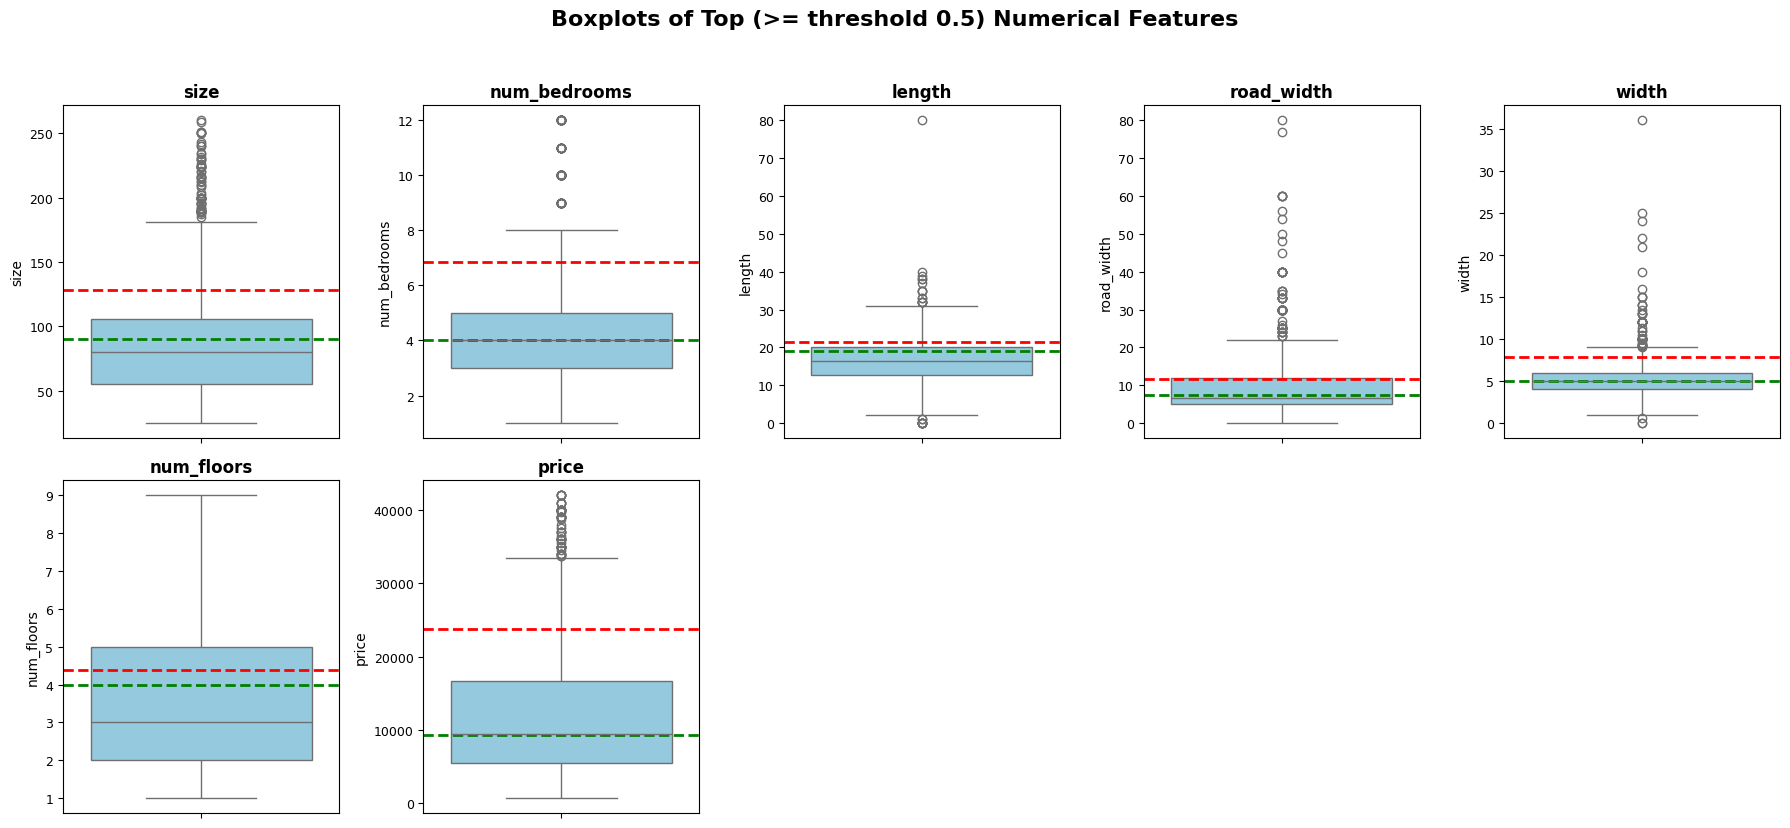

In [34]:
important_cols = [
    "size", "num_bedrooms", "length", "road_width",
    "width", "num_floors", "price"
]

fig, axes = plt.subplots(2, 5, figsize=(18, 8))
axes = axes.flatten()

for i, col in enumerate(important_cols):
    sns.boxplot(data=train_df, y=col, ax=axes[i], color="skyblue")
    axes[i].set_title(col, fontsize=12, fontweight="bold")
    axes[i].tick_params(labelsize=9)
    axes[i].axhline(data[col].mean(), color='red', linestyle="--",
                   linewidth=2, label=f'Mean = {data[col].mean():.2f}')
    axes[i].axhline(data[col].median(), color='green', linestyle="--",
                   linewidth=2, label=f'Median = {data[col].median():.2f}')

for i in range(len(important_cols), len(axes)):
    axes[i].set_visible(False)

plt.suptitle("Boxplots of Top (>= threshold 0.5) Numerical Features", fontsize=16,
             fontweight="bold", y=1.03)

plt.tight_layout()
plt.show()


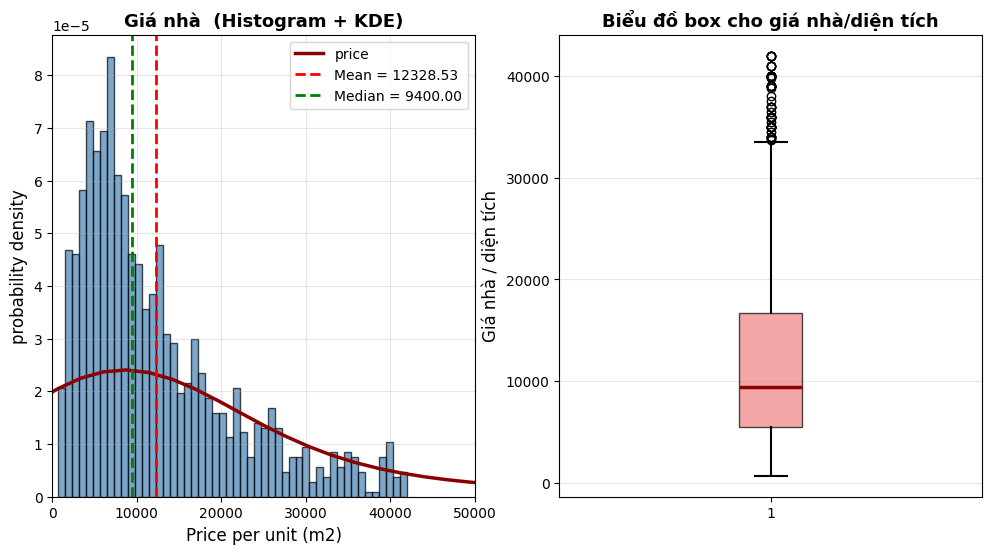

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram vowis KDE
axes[0].hist(train_df['price'], bins=50, color='steelblue',
                edgecolor='black', alpha=0.7, density=True)

data['price'].plot(kind='kde', ax=axes[0], linewidth=2.5, color='darkred')
axes[0].axvline(train_df['price'].mean(), color='red', linestyle="--",
                   linewidth=2, label=f'Mean = {train_df['price'].mean():.2f}')
axes[0].axvline(train_df['price'].median(), color='green', linestyle="--",
                   linewidth=2, label=f'Median = {train_df['price'].median():.2f}')

axes[0].set_xlabel('Price per unit (m2)', fontsize=12)
axes[0].set_ylabel('probability density', fontsize=12)
axes[0].set_title('Giá nhà  (Histogram + KDE)',
                    fontsize=13, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(alpha=0.3)
# Giới hạn vùng hiển thị trên cả hai biểu đồ để trực quan rõ hơn (ví dụ trong khoảng [0, 50000])
min_price, max_price = 0, 50000

axes[0].set_xlim(min_price, max_price)

# Boxplot
bp = axes[1].boxplot(train_df['price'], vert=True, patch_artist=True,
                         boxprops=dict(facecolor='lightcoral', alpha=0.7),
                         medianprops=dict(color='darkred', linewidth=2.5),
                         whiskerprops=dict(linewidth=1.5),
                         capprops=dict(linewidth=1.5))
axes[1].set_ylabel('Giá nhà / diện tích', fontsize=12)
axes[1].set_title('Biểu đồ box cho giá nhà/diện tích', fontsize=13, fontweight='bold')
axes[1].grid(alpha=0.3, axis='y')



#### Chuẩn hóa phân phối chuẩn graussin

Vì phân phối cột target luôn dương, tức giá nhà luôn dương và phân phối bị lệch sang trái là chủ yếu, ta thử chiến lược chuẩn hóa phân phối Box-Cox hoặc Yeo-Johnson

In [36]:
from sklearn.preprocessing import PowerTransformer

skewed = PowerTransformer(method='box-cox', standardize=False)

# Fit cho dữ liệu train và transform cho dữ liệu test
train_df['price'] = skewed.fit_transform(train_df['price'].values.reshape(-1, 1))
test_df['price'] = skewed.transform(test_df['price'].values.reshape(-1, 1))


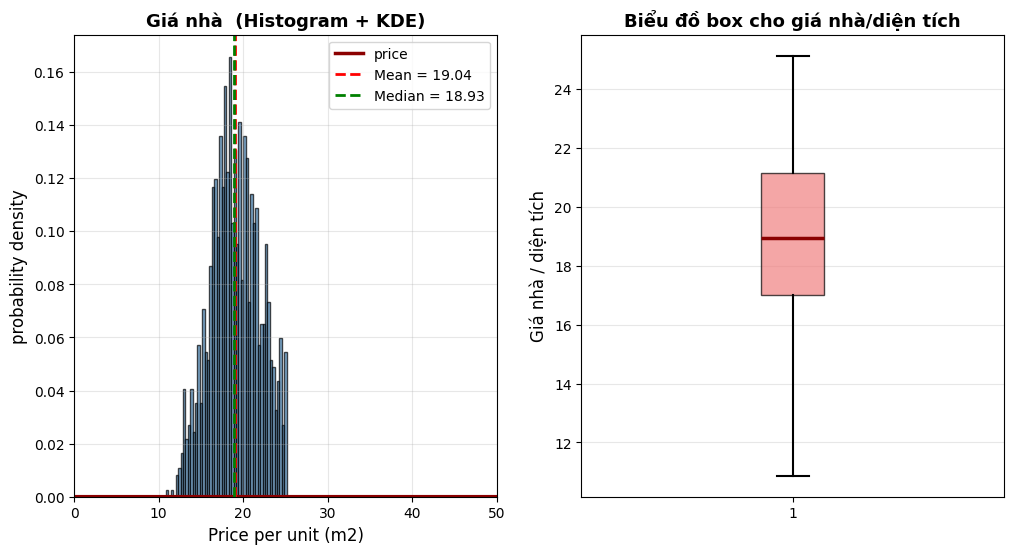

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram vowis KDE
axes[0].hist(train_df['price'], bins=50, color='steelblue',
                edgecolor='black', alpha=0.7, density=True)

data['price'].plot(kind='kde', ax=axes[0], linewidth=2.5, color='darkred')
axes[0].axvline(train_df['price'].mean(), color='red', linestyle="--",
                   linewidth=2, label=f'Mean = {train_df['price'].mean():.2f}')
axes[0].axvline(train_df['price'].median(), color='green', linestyle="--",
                   linewidth=2, label=f'Median = {train_df['price'].median():.2f}')

axes[0].set_xlabel('Price per unit (m2)', fontsize=12)
axes[0].set_ylabel('probability density', fontsize=12)
axes[0].set_title('Giá nhà  (Histogram + KDE)',
                    fontsize=13, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(alpha=0.3)
# Giới hạn vùng hiển thị trên cả hai biểu đồ để trực quan rõ hơn (ví dụ trong khoảng [0, 50000])
min_price, max_price = 0, 50

axes[0].set_xlim(min_price, max_price)

# Boxplot
bp = axes[1].boxplot(train_df['price'], vert=True, patch_artist=True,
                         boxprops=dict(facecolor='lightcoral', alpha=0.7),
                         medianprops=dict(color='darkred', linewidth=2.5),
                         whiskerprops=dict(linewidth=1.5),
                         capprops=dict(linewidth=1.5))
axes[1].set_ylabel('Giá nhà / diện tích', fontsize=12)
axes[1].set_title('Biểu đồ box cho giá nhà/diện tích', fontsize=13, fontweight='bold')
axes[1].grid(alpha=0.3, axis='y')



In [38]:
train_df

,price,size,streetAddress,addressLocality,addressRegion,direction,road_width,property_type,legal_documents,width,length,num_floors,num_bedrooms,has_dining_room,has_kitchen,has_rooftop,has_parking
2382,21.342529,64.0,Đường Ngô Thì Nhậm,Phường Xuân Hương - Đà Lạt,Lâm Đồng,NaN,6.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5.0,14.0,3.0,3.0,NaN,NaN,NaN,NaN
1615,23.903313,56.0,Đường Số 14,Phường Bình Tân,Hồ Chí Minh,Tây,12.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,4.0,14.0,4.0,5.0,1.0,1.0,1.0,1.0
2183,22.997176,72.0,Đường Trường Chinh,Phường Tân Bình,Hồ Chí Minh,Đông,6.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,4.0,18.0,3.0,5.0,1.0,1.0,1.0,1.0
2795,20.534026,160.0,Đường Phú Thọ Hòa,Phường Phú Thọ Hòa,Hồ Chí Minh,NaN,15.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,8.0,20.0,4.0,6.0,NaN,NaN,NaN,NaN
2548,13.540354,35.0,Đường Nam Dư,Phường Lĩnh Nam,Hà Nội,NaN,3.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,3.5,10.0,5.0,3.0,1.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,14.683569,43.0,Đường Đào Tấn,Phường Ngọc Hà,Hà Nội,NaN,40.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,4.1,NaN,7.0,8.0,1.0,1.0,1.0,1.0
466,22.287496,80.0,Đường Nguyễn Minh Hoàng,Phường Bảy Hiền,Hồ Chí Minh,NaN,10.0,"Biệt thự, nhà liền kề",Sổ hồng/ Sổ đỏ,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN
3092,21.153099,100.0,Đường số 3,Phường Nam Nha Trang,Khánh Hòa,Tây Nam,13.0,"Biệt thự, nhà liền kề",Giấy tờ hợp lệ,5.0,20.0,3.0,4.0,1.0,1.0,1.0,1.0
1294,18.966694,145.0,Đường Thiên Hiền,Phường Từ Liêm,Hà Nội,NaN,8.0,"Biệt thự, nhà liền kề",Sổ hồng/ Sổ đỏ,22.0,NaN,4.0,4.0,1.0,1.0,1.0,1.0


In [39]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1290 entries, 2382 to 3174
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            1290 non-null   float64
 1   size             1290 non-null   float64
 2   streetAddress    1262 non-null   object 
 3   addressLocality  1289 non-null   object 
 4   addressRegion    1290 non-null   object 
 5   direction        250 non-null    object 
 6   road_width       1275 non-null   float64
 7   property_type    1290 non-null   object 
 8   legal_documents  997 non-null    object 
 9   width            1074 non-null   float64
 10  length           875 non-null    float64
 11  num_floors       1290 non-null   float64
 12  num_bedrooms     1290 non-null   float64
 13  has_dining_room  667 non-null    float64
 14  has_kitchen      675 non-null    float64
 15  has_rooftop      591 non-null    float64
 16  has_parking      583 non-null    float64
dtypes: float64(11), 

In [40]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 2213 to 288
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            317 non-null    float64
 1   size             317 non-null    float64
 2   streetAddress    312 non-null    object 
 3   addressLocality  315 non-null    object 
 4   addressRegion    317 non-null    object 
 5   direction        52 non-null     object 
 6   road_width       314 non-null    float64
 7   property_type    317 non-null    object 
 8   legal_documents  244 non-null    object 
 9   width            257 non-null    float64
 10  length           205 non-null    float64
 11  num_floors       317 non-null    float64
 12  num_bedrooms     317 non-null    float64
 13  has_dining_room  171 non-null    float64
 14  has_kitchen      173 non-null    float64
 15  has_rooftop      156 non-null    float64
 16  has_parking      147 non-null    float64
dtypes: float64(11), ob

#### Fill missing value bằng các chiến lược cụ thể với từng feature

In [41]:
from sklearn.impute import SimpleImputer, KNNImputer

In [42]:
# Thử drop các cột mang giá trị bool
bool_cols = ['has_dining_room', 'has_kitchen', 'has_rooftop', 'has_parking']
train_df = train_df.drop(bool_cols, axis=1)
test_df = test_df.drop(bool_cols, axis=1)

In [43]:
# Các category feature có ý nghĩa vị trí và tài liệu quan trọng, nên chỉ fill là none, coi là không biết
cat_cols = ['streetAddress', 'addressLocality', 'addressRegion', 'direction', 'legal_documents']
train_df[cat_cols] = train_df[cat_cols].fillna('none')
test_df[cat_cols] = test_df[cat_cols].fillna('none')

# Fillna các continue feature bằng chiến lược, ta sẽ thử impute giá tị thiếu bằng SimpleImputer hoặc KNNImputer
num_cols = ['road_width', 'width', 'length']
Imputer_numberic = KNNImputer(n_neighbors=5)
train_df[num_cols] = Imputer_numberic.fit_transform(train_df[num_cols])
test_df[num_cols] = Imputer_numberic.transform(test_df[num_cols])

# Fillna các feature dạng số tầng, số phòng ngủ, ta sẽ thử fillna bằng chiến lược mode
floor_cols = ['num_floors', 'num_bedrooms']
Imputer_mode = SimpleImputer(strategy='most_frequent')
train_df[floor_cols] = Imputer_mode.fit_transform(train_df[floor_cols])
test_df[floor_cols] = Imputer_mode.transform(test_df[floor_cols])

# # Fillna các feature giá trị bool, giá trị 0 có thể coi là không biết
# bool_cols = ['has_dining_room', 'has_kitchen', 'has_rooftop', 'has_parking']
# train_df[bool_cols] = train_df[bool_cols].fillna(0)
# test_df[bool_cols] = test_df[bool_cols].fillna(0)


train_df = train_df.dropna(subset=['price'])
test_df = test_df.dropna(subset=['price'])


In [44]:
train_df.describe()

,price,size,road_width,width,length,num_floors,num_bedrooms
count,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000,1290.000000
mean,19.039560,88.378295,9.526427,5.512658,16.622607,3.463566,4.319380
std,2.910993,45.500044,8.444598,2.305261,5.688503,1.704916,2.197469
min,10.870990,25.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,17.010650,55.000000,5.000000,4.280000,13.000000,2.000000,3.000000
50%,18.927347,80.000000,7.000000,5.000000,16.800000,3.000000,4.000000
75%,21.153099,106.000000,12.000000,6.000000,20.000000,5.000000,5.000000
max,25.131598,260.000000,80.000000,36.000000,80.000000,9.000000,12.000000


Téch riêng nhãn và data riêng

In [45]:

X_train = train_df.drop(['price'], axis=1)
X_test = test_df.drop(['price'], axis=1)

y_train = train_df['price'].values 
y_test = test_df['price'].values 



In [46]:
X_train.head()

,size,streetAddress,addressLocality,addressRegion,direction,road_width,property_type,legal_documents,width,length,num_floors,num_bedrooms
2382,64.0,Đường Ngô Thì Nhậm,Phường Xuân Hương - Đà Lạt,Lâm Đồng,none,6.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5.0,14.0,3.0,3.0
1615,56.0,Đường Số 14,Phường Bình Tân,Hồ Chí Minh,Tây,12.0,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,4.0,14.0,4.0,5.0
2183,72.0,Đường Trường Chinh,Phường Tân Bình,Hồ Chí Minh,Đông,6.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,4.0,18.0,3.0,5.0
2795,160.0,Đường Phú Thọ Hòa,Phường Phú Thọ Hòa,Hồ Chí Minh,none,15.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,8.0,20.0,4.0,6.0
2548,35.0,Đường Nam Dư,Phường Lĩnh Nam,Hà Nội,none,3.0,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,3.5,10.0,5.0,3.0


Lọc ra các category quan trọng để giữ lại, còn lại cho vào "Other" để tránh curse of dimention

In [47]:
# def reduce_categories(data, col, threshold=100):
#     """Giữ lại top N categories, gộp còn lại thành 'Other'"""
#     value_counts = data[col].value_counts()
#     top_categories = value_counts.head(threshold).index
#     data[col] = data[col].apply(lambda x: x if x in top_categories else 'Other')
#     return data

# # Áp dụng trước khi One-Hot Encoding
# for col in ['streetAddress', 'addressLocality', 'addressRegion']:
#     data = reduce_categories(data, col, threshold=50)  # Chỉ giữ 50 giá trị phổ biến nhất

Mã hóa 1hot-encoder với các feature dạng categorical

In [48]:
# cat_cols = ['streetAddress', 'addressLocality', 'addressRegion', 'direction', 'property_type', 'legal_documents']
# OneHot = OneHotEncoder(
#     handle_unknown="ignore",
#     sparse_output=False
# )
# OneHot.fit(X_train[cat_cols])

# OneHot_cols = list(OneHot.get_feature_names_out(cat_cols))

# X_train[OneHot_cols] = OneHot.transform(X_train[cat_cols])
# X_test[OneHot_cols] = OneHot.transform(X_test[cat_cols])

# X_train = X_train.drop(cat_cols, axis=1)
# X_test = X_test.drop(cat_cols, axis=1)


thử encode categories feature bầng target encoder, với mục tiêu encode thành 1 cột qua mean label để tránh curse of dimension

In [49]:
from category_encoders import TargetEncoder

cat_cols = ['streetAddress', 'addressLocality', 'addressRegion', 'direction', 'property_type', 'legal_documents']
target_encoder = TargetEncoder(cols=cat_cols)
X_train_encoded = target_encoder.fit_transform(X_train[cat_cols], y_train)
X_test_encoded = target_encoder.transform(X_test[cat_cols])

X_train = X_train.drop(cat_cols, axis=1)
X_train = pd.concat([X_train, X_train_encoded], axis=1)

X_test = X_test.drop(cat_cols, axis=1)
X_test = pd.concat([X_test, X_test_encoded], axis=1)

Xem thử outlier của dữ liệu số tổng quan (trước khi tách train/test), để tìm chiến lược scaler phù hợp: std, robus hay loại bỏ qua IQR
- Ở đây được chọn robus scaler vì dữ liệu outlier có khả năng là nhà siêu to khổng lồ

$$
x_{RobusScaler} = \frac{x - Q2}{Q3 - Q1}
$$

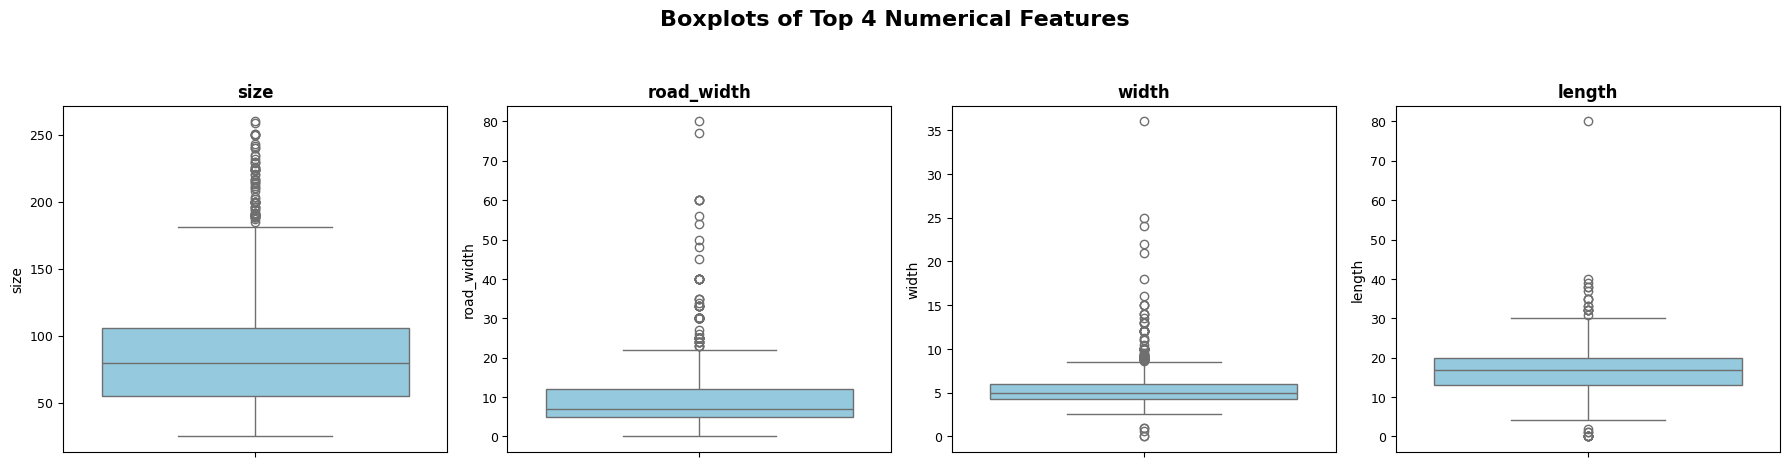

In [50]:
numberic_cols = ['size', 'road_width', 'width', 'length']

fig, axes = plt.subplots(2, 4, figsize=(18, 8))
axes = axes.flatten()

for i, col in enumerate(numberic_cols):
    sns.boxplot(data=train_df, y=col, ax=axes[i], color="skyblue")
    axes[i].set_title(col, fontsize=12, fontweight="bold")
    axes[i].tick_params(labelsize=9)

for i in range(len(numberic_cols), len(axes)):
    axes[i].set_visible(False)

plt.suptitle("Boxplots of Top 4 Numerical Features", fontsize=16, 
             fontweight="bold", y=1.03)

plt.tight_layout()
plt.show()

In [51]:
numberic_cols = ['size', 'road_width', 'width', 'length']

NumbericScaler = RobustScaler()
NumbericScaler.fit(X_train[numberic_cols])

X_train[numberic_cols] = NumbericScaler.transform(X_train[numberic_cols])
X_test[numberic_cols] = NumbericScaler.transform(X_test[numberic_cols])

# 4. Huấn luyện mô hình sử dụng bộ dữu liệu đã được tiền xử lý trước đó, bộ dữ liệu gồm:
- 1 chỉ số numberic được giữ nguyên: ['num_floors']
- 4 chỉ số numberic được scaler qua chiến lược robus scaler: ['size', 'road_width', 'width', 'length']
- 5 chỉ số book : ['has_dining_room', 'has_kitchen', 'has_rooftop', 'has_parking', 'is_owner']
- Các chỉ số category được 1hot encoder: ['streetAddress', 'addressLocality', 'addressRegion', 'direction', 'property_type', 'legal_documents']

In [54]:
# Ipmport cá thưu viện cơ bản
import numpy as np 
import pandas as pd

# Import các thư viện tiền xử lý
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, minmax_scale
from sklearn.preprocessing import PolynomialFeatures
# Import các model
# simple model
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error, r2_score


import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# Kiểm tra và lưu kết quả cross-validation cho các mô hình

from sklearn.model_selection import RepeatedKFold, cross_val_score

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "RandomForest": RandomForestRegressor(
        n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=5,
        random_state=42
    ),
    "XGBoost": XGBRegressor(
        learning_rate=0.01,
        n_estimators=100,
        max_depth=8,
        subsample=0.8,
        random_state=42, 
        verbosity=0
    ),
    "LightGBM": LGBMRegressor(random_state=42, force_col_wise=True)
}

# Danh sách lưu trữ kết quả
results = {
    "Model": [],
    "Train_RMSE": [],
    "Test_RMSE": [],
    "Train_R2": [],
    "Test_R2": [],
    "CV_R2_Mean": [],
    "CV_R2_Std": []
}

# Cross-validation strategy
cv_strategy = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

for name, model in models.items():
    # Cross-validation scores trên tập huấn luyện
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv_strategy, scoring='r2')
    cv_r2_mean = np.mean(cv_scores)
    cv_r2_std = np.std(cv_scores)
    
    # Huấn luyện với toàn bộ tập huấn luyện
    regressor = model.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    y_test_pred = regressor.predict(X_test)
    
    # RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # R2
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Lưu kết quả
    results["Model"].append(name)
    results["Train_RMSE"].append(train_rmse)
    results["Test_RMSE"].append(test_rmse)
    results["Train_R2"].append(train_r2)
    results["Test_R2"].append(test_r2)
    results["CV_R2_Mean"].append(cv_r2_mean)
    results["CV_R2_Std"].append(cv_r2_std)

# Tổng hợp kết quả vào DataFrame
df_results = pd.DataFrame(results).sort_values(by='Test_R2', ascending=False)
df_results

[LightGBM] [Info] Total Bins 759
[LightGBM] [Info] Number of data points in the train set: 1032, number of used features: 12
[LightGBM] [Info] Start training from score 18.998015
[LightGBM] [Info] Total Bins 763
[LightGBM] [Info] Number of data points in the train set: 1032, number of used features: 12
[LightGBM] [Info] Start training from score 19.018246
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 1032, number of used features: 12
[LightGBM] [Info] Start training from score 19.069221
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 1032, number of used features: 12
[LightGBM] [Info] Start training from score 19.108824
[LightGBM] [Info] Total Bins 755
[LightGBM] [Info] Number of data points in the train set: 1032, number of used features: 12
[LightGBM] [Info] Start training from score 19.003496
[LightGBM] [Info] Total Bins 757
[LightGBM] [Info] Number of data points in the train set: 1032, number o

,Model,Train_RMSE,Test_RMSE,Train_R2,Test_R2,CV_R2_Mean,CV_R2_Std
2,Lasso,2.909865,2.976902,0.000000,-0.001933,-0.003037,0.003501
4,XGBoost,1.787462,3.153529,0.622664,-0.124355,0.412562,0.023214
1,Ridge,1.977922,3.381441,0.537967,-0.292746,0.526180,0.030567
0,LinearRegression,1.977847,3.387244,0.538002,-0.297187,0.525943,0.030862
3,RandomForest,1.538561,3.410807,0.720434,-0.315297,0.478063,0.033154
5,LightGBM,1.147968,3.479149,0.844363,-0.368534,0.386757,0.036432


Thử poly feature cho các mô hình tuyến tính

In [ ]:
numberic_cols = ['size', 'road_width', 'width', 'length']

poly_features = PolynomialFeatures(
    degree=2, interaction_only=True, include_bias=False
)

train_poly = poly_features.fit_transform(X_train[numberic_cols])
test_poly = poly_features.transform(X_test[numberic_cols])

X_train_poly = np.hstack([train_poly, X_train.drop(numberic_cols, axis=1).values])
X_test_poly = np.hstack([test_poly, X_test.drop(numberic_cols, axis=1).values])

In [ ]:
# Tiến hành dự đoán cho model
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso()
}

# Danh sách lưu trữ kết quả
train_rmse_results = []
test_rmse_results = []
train_r2_results = []
test_r2_results = []
model_names = []

# Huấn luyện và lưu trữ đnash giá cho mô hình
for name, model in models.items():
    
    regressor = model.fit(X_train_poly, y_train)

    # predict
    y_train_pred = regressor.predict(X_train_poly)
    y_test_pred = regressor.predict(X_test_poly)

    # RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # R2
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Lưu kết quả
    model_names.append(model)
    train_rmse_results.append(train_rmse)
    test_rmse_results.append(test_rmse)
    train_r2_results.append(train_r2)
    test_r2_results.append(test_r2)

# Taoj datafame tổng hợp để nhìn 
df_results = pd.DataFrame({
    "Model": model_names,
    "Train_RMSE": train_rmse_results,
    "Test_RMSE": test_rmse_results,
    "Train_R2": train_r2_results,
    "Test_R2": test_r2_results
}).sort_values(by='Test_R2', ascending=False)

df_results